In [1]:
from urllib.request import urlretrieve

In [2]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'
urlretrieve(italy_covid_url, 'italy-covid-data.csv')

('italy-covid-data.csv', <http.client.HTTPMessage at 0x2900ed0f220>)

In [3]:
import pandas as pd

In [4]:
covid_df = pd.read_csv('italy-covid-data.csv')

In [5]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [6]:
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [8]:
covid_df['new_tests'].isnull().sum()

113

In [9]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [10]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [11]:
covid_df.shape

(248, 4)

In [12]:
cases_df = covid_df[['date','new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [13]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [14]:
type(covid_df.loc[245])

pandas.core.series.Series

In [15]:
covid_df.head(15)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


In [16]:
covid_df.tail()

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [17]:
covid_df.at[244, 'new_cases']

1365.0

In [18]:
covid_df.new_tests.first_valid_index()

111

In [19]:
covid_df.loc[102:108]

,date,new_cases,new_deaths,new_tests
102,2020-04-11,3951.0,570.0,NaN
103,2020-04-12,4694.0,619.0,NaN
104,2020-04-13,4092.0,431.0,NaN
105,2020-04-14,3153.0,564.0,NaN
106,2020-04-15,2972.0,604.0,NaN
107,2020-04-16,2667.0,578.0,NaN
108,2020-04-17,3786.0,525.0,NaN


In [20]:
covid_df.sample(5)

,date,new_cases,new_deaths,new_tests
77,2020-03-17,4000.0,347.0,NaN
89,2020-03-29,5974.0,887.0,NaN
124,2020-05-03,1900.0,474.0,27047.0
135,2020-05-14,888.0,195.0,41131.0
136,2020-05-15,992.0,262.0,39027.0


In [21]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()
total_tests = covid_df.new_tests.sum()

In [22]:
total_cases

271515.0

In [23]:
total_deaths

35497.0

In [24]:
death_rate = (total_deaths/total_cases) * 100

In [25]:
death_rate

13.073679170579894

In [26]:
initial_tests = 935310
total_tests = initial_tests + total_tests
total_tests

5214766.0

In [27]:
positive_rate = total_cases / total_tests
positive_rate

0.05206657403227681

In [28]:
high_cases_df = covid_df[covid_df.new_cases > 100]
high_cases_df

,date,new_cases,new_deaths,new_tests
59,2020-02-28,250.0,5.0,NaN
60,2020-02-29,238.0,4.0,NaN
61,2020-03-01,240.0,8.0,NaN
62,2020-03-02,561.0,6.0,NaN
63,2020-03-03,347.0,17.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [29]:
covid_df.sort_values('new_cases', ascending= False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [30]:
covid_df.sort_values('new_deaths').head(10)

,date,new_cases,new_deaths,new_tests
177,2020-06-25,577.0,-31.0,29421.0
30,2020-01-30,0.0,0.0,NaN
31,2020-01-31,3.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
35,2020-02-04,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [31]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [32]:
covid_df['date'] = pd.to_datetime(covid_df['date'])

In [33]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [34]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [35]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [36]:
covid_df.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5


In [37]:
df_may = covid_df[covid_df.month == 5]

In [38]:
df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [39]:
df_may_metrics = df_may[['new_cases', 'new_deaths','new_tests']]
may_total_df = df_may_metrics.sum()

In [40]:
may_total_df

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [41]:
covid_month_df = covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].sum()

In [42]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [43]:
covid_month_df = covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].mean()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,259.066667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [44]:
covid_df.head(10)

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
5,2020-01-05,0.0,0.0,NaN,2020,1,5,6
6,2020-01-06,0.0,0.0,NaN,2020,1,6,0
7,2020-01-07,0.0,0.0,NaN,2020,1,7,1
8,2020-01-08,0.0,0.0,NaN,2020,1,8,2
9,2020-01-09,0.0,0.0,NaN,2020,1,9,3


In [45]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum()

# Marging data from multiple sources

In [46]:
country_locations = 'https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv'

In [47]:
urlretrieve(country_locations, 'location.csv')

('location.csv', <http.client.HTTPMessage at 0x29011132430>)

In [48]:
locations_df = pd.read_csv('location.csv')

In [49]:
locations_df.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495


In [50]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [51]:
covid_df.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN


In [52]:
covid_df['location'] = 'Italy'

In [53]:
covid_df.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy


In [54]:
merged_df = covid_df.merge(locations_df, on='location')

In [55]:
merged_df.tail(2)

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
247,2020-09-03,1326.0,6.0,NaN,2020,9,3,3,271515.0,35497.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [56]:
locations_df.tail(2)

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
210,World,NaN,7.794799e+09,72.58,2.705,15469.207
211,International,NaN,NaN,NaN,NaN,NaN


In [57]:
merged_df['cases_per_million'] = (merged_df.total_cases / merged_df.population) * 1e6
merged_df['deaths_per_million'] = (merged_df.total_deaths / merged_df.population) * 1e6
merged_df['tests_per_million'] = (merged_df.total_tests / merged_df.population) * 1e6

In [58]:
merged_df.tail()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4413.578101,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4436.154329,586.766910,69879.809125
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4452.627532,586.866146,70779.467667
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4468.753409,586.998461,NaN
247,2020-09-03,1326.0,6.0,NaN,2020,9,3,3,271515.0,35497.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697,NaN


In [59]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [60]:
merged_df.tail()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4413.578101,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4436.154329,586.766910,69879.809125
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4452.627532,586.866146,70779.467667
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4468.753409,586.998461,NaN
247,2020-09-03,1326.0,6.0,NaN,2020,9,3,3,271515.0,35497.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697,NaN


# Writing Data back to Files

In [61]:
result_df = merged_df[['date', 
                        'new_cases', 
                        'total_cases', 
                        'new_deaths', 
                        'total_deaths',
                        'new_tests', 
                        'total_tests', 
                        'cases_per_million', 
                        'deaths_per_million', 
                        'tests_per_million']]


In [62]:
result_df.tail(10)

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
238,2020-08-25,953.0,260298.0,4.0,35441.0,45798.0,3883814.0,4305.162590,586.171493,64235.801802
239,2020-08-26,876.0,261174.0,4.0,35445.0,58054.0,3941868.0,4319.651070,586.237651,65195.977866
240,2020-08-27,1366.0,262540.0,13.0,35458.0,57640.0,3999508.0,4342.243837,586.452662,66149.306634
241,2020-08-28,1409.0,263949.0,5.0,35463.0,65135.0,4064643.0,4365.547797,586.535359,67226.597912
242,2020-08-29,1460.0,265409.0,9.0,35472.0,64294.0,4128937.0,4389.695264,586.684213,68289.979588
243,2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,4182478.0,4413.578101,586.700753,69175.513516
244,2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,4225061.0,4436.154329,586.766910,69879.809125
245,2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,4279456.0,4452.627532,586.866146,70779.467667
246,2020-09-02,975.0,270189.0,8.0,35491.0,NaN,NaN,4468.753409,586.998461,NaN
247,2020-09-03,1326.0,271515.0,6.0,35497.0,NaN,NaN,4490.684602,587.097697,NaN


In [63]:
result_df.to_csv('results.csv', index=None)

<AxesSubplot:>

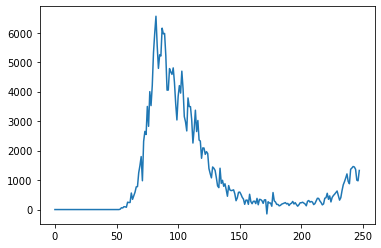

In [64]:
result_df.new_cases.plot()

In [65]:
result_df.set_index('date', inplace=True)

In [66]:
result_df.head(2)

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN


<AxesSubplot:xlabel='date'>

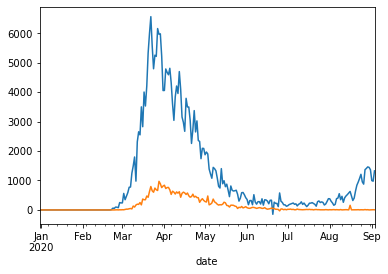

In [67]:
result_df.new_cases.plot()
result_df.new_deaths.plot()

<AxesSubplot:xlabel='date'>

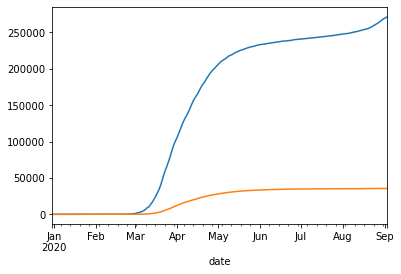

In [68]:
result_df.total_cases.plot()
result_df.total_deaths.plot()

<AxesSubplot:xlabel='month'>

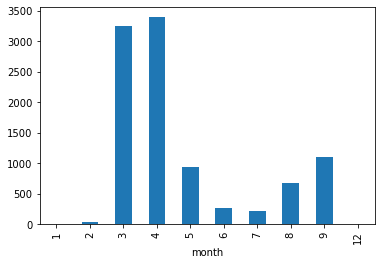

In [69]:
covid_month_df.new_cases.plot(kind='bar')